In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
def calculate_coefficients_continuity(x, section_index, row_vector):
    
    """ calculate coefficients that must satisfy continuity for the spline at point x and put into row_vector
        return row_vector
    """
    start_index = section_index*4    # determine start index according to the section
    for i in range(4):
        row_vector[start_index+i] = x**(3-i)
    
    return row_vector

In [4]:
def calculate_coefficients_derivative(x, point_index, row_vector, derivative_order=1):
    
    """ calculate coefficients that must satisfy continuity for derivatives
    """
    coefs = calculate_derivative([1,1,1,1])
    if derivative_order == 2:
        coefs = calculate_derivative(coefs)
    
    n = len(coefs)
    start_index = point_index*4
    
    for i in range(n):
        coef = coefs[i]*x**(n-i-1)
        row_vector[start_index+i] = coef
        row_vector[start_index+i+4] = -coef
    
    return row_vector

In [9]:
def calculate_splines(fx_mapping):
    
    """ calculate cubic section splines, by solving a system of eqations
        returns the a list of spilnes, each spline in this list is a list of coefficients
    """
    n_sections = len(fx_mapping) - 1    # number of secions, for each section we will construct a spline
    n_internal_pts = len(fx_mapping) - 2    # number of internal points (exclude end points), for every point we must staisfy continuity of derivatives
    n_unknows = n_sections * 4    # number of total unknowns, the unknowns are the coefficients of the section splines
    
    A = np.zeros((n_unknows,n_unknows))    # coefficients matrix
    b = np.zeros((n_unknows))    # solutions vector
    splines = np.zeros(n_sections, dtype=[("start", np.float64), ("end", np.float64), ("coefs",np.float64, 4)])    # create a structured array to store spline coefficients and section limits
    
    """ 2(n-1) eqations, n is the number of given data points
    """
    for i in range(n_sections): # iterate over sections, for each section construct a spline that satisfy boundary conditions
        
        # iterate over two end points in the section
        for j in range(2):
            
            x = fx_mapping[i+j][0]
            f = fx_mapping[i+j][1]
            splines[i][j] = x
            
            row_index = i*2 + j
            A[row_index] = calculate_coefficients_continuity(x, section_index=i, row_vector=A[row_index])
            b[row_index] = f
            
    
    """ 2(n-2) eqations
    """
    for i in range(n_internal_pts): # iterate over internal points, for each point satisfy continuity conditions for first and second derivatives
        
        x = fx_mapping[i+1][0]
        
        row_index = n_sections*2 + i
        A[row_index] = calculate_coefficients_derivative(x, i, A[row_index])
            
        row_index = n_sections*2 + 4 + i
        A[row_index] = calculate_coefficients_derivative(x, i, A[row_index], derivative_order=2)
        
    
    """ 2 last eqations. total number of eqations is 4(n-1), n is number of given data points
    """
    # manually add two more condition to satisfy number of eqation to be eqaul to n_unknows
    A[-2][0] = 1    # second derivative of first section spline is zero
    A[-1][-4] = 1    # second derivative of last section spline is zero
    
    
    coef_vec = np.linalg.solve(A, b) # solve system to get coefficients vector
    
    # split coef_vec to splines
    for i in range(n_sections):
        coef_index = i*4    # index of the first coefficient in coef_vec that's relevant for the i-th spline
        splines[i]["coefs"] = coef_vec[coef_index:coef_index+4]


    return splines

In [6]:
def make_func(coefs):
    
    """ coefs is a list/array of a polynomial coefficients.
        returns a convenient function that calculates function value at given point x
    """
    n = len(coefs)
    
    def f(x):
        return sum([coefs[i]*x**(n-1-i)  for i in range(n)])
    
    return f    

In [7]:
def calculate_derivative(coefs):
    
    """ coefs is a list/array of a polynomial coefficients.
        return a list of coefficients of polynomial derivative
    """
    n = len(coefs)
    
    derivative_coefs = [(n-1-i)*coefs[i] for i in range(n)]
    return derivative_coefs[:-1] # slice last item from the list to reduce order by 1

### Plot for question 1a

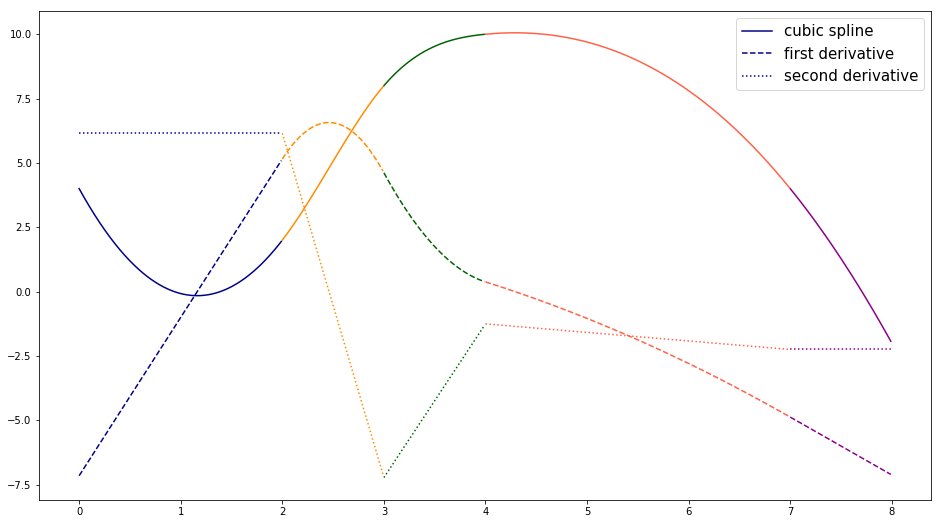

In [10]:
fx_mapping1 = [(0,4), (2,2), (3,8), (4,10), (7,4), (8,-2)]

plt.figure(figsize=(16,9))
splines = calculate_splines(fx_mapping1)
colors = ["darkblue", "darkorange", "darkgreen", "tomato", "darkmagenta"]

for spl in splines:
    start = spl["start"]
    end = spl["end"]
    spl_index = np.where(splines==spl)[0][0]
    x = np.arange(start,end,0.01) # set section dots for plotting
    
    f = make_func(spl["coefs"]) # make a function from spline coefficients
    
    derivative1 = calculate_derivative(spl["coefs"]) # get the coefficients of first derivative
    f_tag = make_func(derivative1)
    
    derivative2 = calculate_derivative(derivative1) # get the coefficients of second derivative
    f_tag2 = make_func(derivative2)
    
    plt.plot(x, f(x), c=colors[spl_index])
    plt.plot(x, f_tag(x), c=colors[spl_index], linestyle="--")
    plt.plot(x, f_tag2(x), c=colors[spl_index], linestyle=":")
    

# set legend
lines = [Line2D([0], [0], color="darkblue", linewidth=1.5, linestyle=st) for st in ["-", "--", ":"]]
labels = ["cubic spline", "first derivative", "second derivative"]
plt.legend(lines, labels, prop={'size': 15})
plt.show()

### Plot for question 1b

In [33]:
def calculate_splines_parametric(fx_mapping):
    
    """ calculate cubic section splines, by solving a system of eqations
        returns the a list of spilnes, each spline in this list is a list of coefficients
    """
    

In [25]:
fx_mapping2 = [(3,4), (2,3), (2.5,1), (4,2), (5,3.5), (4,4.5)]
n = len(fx_mapping2)
x_map = [(i,fx_mapping2[i][0]) for i in range(n)]
# calculate_splines_parametric(x_map)

In [33]:
x_map

[(0, 0), (1, 3), (2, 2), (3, 2.5), (4, 4), (5, 5), (6, 4), (7, 0)]

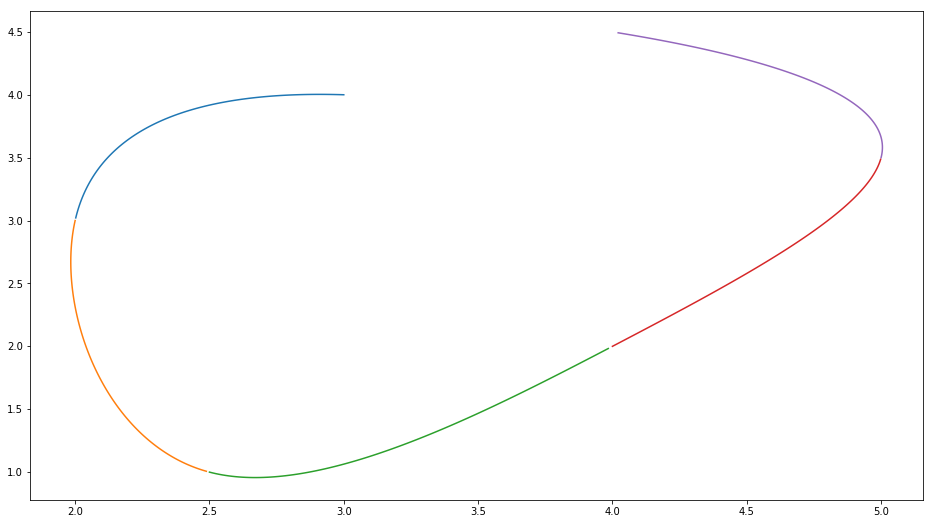

In [12]:
fx_mapping2 = [(3,4), (2,3), (2.5,1), (4,2), (5,3.5), (4,4.5)]
n = len(fx_mapping2)

x_map = [(i+1,fx_mapping2[i][0]) for i in range(n)]
y_map = [(i+1,fx_mapping2[i][1]) for i in range(n)]

# x_map.insert(0,(0,0))
# y_map.insert(0,(0,0))
# x_map.append((n+1,x_map[0][1]))
# y_map.append((n+1,y_map[0][1]))


colors = ["darkblue", "darkorange", "darkgreen", "tomato", "darkmagenta"]

plt.figure(figsize=(16,9))
x_splines = calculate_splines(x_map)
y_splines = calculate_splines(y_map)
n_splines = len(x_splines)

for i in range(n_splines):
    x_spl = x_splines[i]
    y_spl = y_splines[i]
    start = x_spl["start"]
    end = x_spl["end"]
    
    if start > end:
        start = x_spl["end"]
        end = x_spl["start"]
    
    t = np.arange(start,end,0.01) # set section dots for plotting
    x = make_func(x_spl["coefs"])
    y = make_func(y_spl["coefs"])
    
#     plt.plot(x(t), y(t), c=colors[i])
    plt.plot(x(t), y(t))
    

In [47]:
# def calculate_splines(fx_mapping):
    
#     """ calculate cubic section splines, by solving a system of eqations
#         returns the a list of spilnes, each spline in this list is a list of coefficients
#     """
#     n_sections = len(fx_mapping) - 1    # number of secions, for each section we will construct a spline
#     n_internal_pts = len(fx_mapping) - 2    # number of internal points (exclude end points), for every point we must staisfy continuity of derivatives
    
#     n_unknows = n_sections * 4    # number of total unknowns, the unknowns are the coefficients of the section splines
#     A = np.zeros((n_unknows,n_unknows))    # coefficients matrix
#     b = np.zeros((n_unknows))    # solutions vector
#     splines = np.zeros(n_sections, dtype=[("start", np.float64), ("end", np.float64), ("coefs",np.float64, 4)])    # create a structured array to store spline coefficients and section limits
    
#     """ 2(n-1) eqations, n is the number of given data points
#     """
#     for i in range(n_sections): # iterate over sections, for each section construct a spline that satisfy boundary conditions
        
#         # iterate over two end points in the section
#         for j in range(2):
            
#             x = fx_mapping[i+j][0]
#             f = fx_mapping[i+j][1]
#             row_index = i*2 + j
#             splines[i][j] = x
#             b[row_index] = f
            
#             for k in range(4): # iterate over 4 coefficeints of section spline and insert them to matrix A
#                 A[row_index][i*4 + k] = x**(3-k)
                
    
    
#     """ 2(n-2) eqations
#     """
#     for i in range(n_internal_pts): # iterate over internal points, for each point satisfy continuity conditions for first and second derivatives
        
#         x = fx_mapping[i+1][0]
        
#         row_index = n_sections*2 + i
        
#         for k in range(3): # iterate over 3 coefficeints of the first derivatives of the section spline and insert them to matrix A
#             coef = (3-k)*x**(2-k)
#             col_index = i*4 + k
#             A[row_index][col_index] = coef
#             A[row_index][col_index + 4] = -coef
            
            
#         row_index = n_sections*2 + 4 + i
        
#         for k in range(2): # iterate over 2 coefficeints of the second derivatives of the section spline and insert them to matrix A
#             fac = np.math.factorial(3-k)    # factorial
#             coef = fac*x**(1-k)
#             col_index = i*4 + k
#             A[row_index][col_index] = coef
#             A[row_index][col_index + 4] = -coef
        
    
#     """ 2 last eqations. total number of eqations is 4(n-1), n is number of given data points
#     """
#     # manually add two more condition to satisfy number of eqation to be eqaul to n_unknows
#     A[-2][0] = 1    # second derivative of first section spline is zero
#     A[-1][-4] = 1    # second derivative of last section spline is zero
        
    
#     coef_vec = np.linalg.solve(A, b) # solve system to get coefficients vector
    
#     # split coef_vec to splines
#     for i in range(n_sections):
#         coef_index = i*4    # index of the first coefficient in coef_vec that's relevant for the i-th spline
#         splines[i]["coefs"] = coef_vec[coef_index:coef_index+4]


#     return splines